In [1]:
import numpy as np
import scipy.stats as ss

In [2]:
x = np.sort(-np.array([0.55,0.74,0.77,0.81,0.84,0.93,1.04,1.11,1.13,1.24,1.25,1.27,1.28,1.29,1.30,1.36,1.39,1.42,1.48,1.48,1.49,1.49,1.50,1.50,1.51,
1.52,1.53,1.54,1.55,1.55,1.58,1.59,1.60,1.61,1.61,1.61,1.61,1.62,1.62,1.63,1.64,1.66,1.66,1.66,1.67,1.68,1.68,1.69,1.70,1.70,1.73,1.76,1.76,1.77,1.78,1.81,1.82,1.84,1.84,1.89,
2.00,2.01,2.24]))

In [3]:
maximum = np.maximum((x.reshape(-1,1) - x.reshape(1,-1)),0)
num_max = (x.reshape(-1,1) - x.reshape(1,-1) >= 0)*1

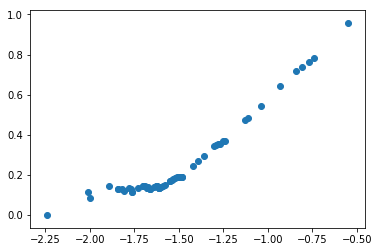

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x,np.sum(maximum,axis=1)/np.sum(num_max,axis=1))

This allows us to set -1.4 as the minimum threshold for this problem, i.e. $u_0 = -1.4$

In [5]:
u0 = -1.4
x_tail = x[x > u0]
p0 = len(x_tail)/len(x)

In [6]:
x_tail-u0

array([0.01, 0.04, 0.1 , 0.11, 0.12, 0.13, 0.15, 0.16, 0.27, 0.29, 0.36,
       0.47, 0.56, 0.59, 0.63, 0.66, 0.85])

In [7]:
c,_,scale = ss.genpareto.fit(x_tail-u0,floc=0)
print(c)
print(scale)

-0.5697184618101314
0.5279858619189045


/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:2248: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1035: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2316: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


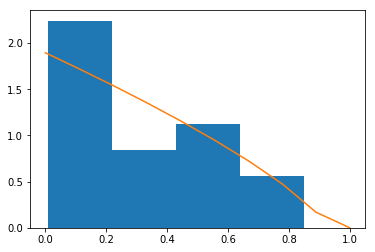

In [9]:
plt.hist(x_tail-u0,bins=4,density=True)
z = np.linspace(0,1,10)
plt.plot(z,ss.genpareto.pdf(z,c=c,loc=0,scale=scale))

In [10]:
alpha=0.01
ss.genpareto.ppf(1-alpha/p0,c=c,loc=0,scale=scale)+u0

-0.6150371995423031